In [19]:
#Import
import sys

from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from pandas.io.json import json_normalize

from keras.datasets import imdb
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers
from keras import losses
from keras import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import text 

from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import Activation
from keras.layers import Conv1D
from keras import regularizers
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout
import nltk
from nltk.corpus import stopwords
from keras.layers import LSTM


results=[]
results_names=[]

In [20]:
data = []
print("Reading in file")
#json_list = ['reviews_Movies_and_TV_5.json','reviews_Amazon_Instant_Video_5.json']
#json_list = ['reviews_Movies_and_TV_5.json'] 
json_list = ['reviews_Amazon_Instant_Video_5.json'] # USed for fast testing
counter = 0
for file in json_list:
    counter+=1
    print("On file " + str(counter) + " out of " + str(len(json_list)))
    with open('/Volumes/TOSHIBA/desktop/data_sets/'+ file) as f:
        for line in f:
            data.append(json.loads(line))
            
limit = 500000
print("Shuffle the order, limiting entries to " + str(limit))
shuffle(data)

print("Making df")
df = pd.DataFrame.from_dict(json_normalize(data[:limit]), orient='columns')

    #print(df)
    #df = df.values.tolist()
     
header = df.columns.tolist()
    
print("removing non letters")
# Remove unneeded special characters by encoding to ascii and then recoding to utf-8
df.reviewText = df.reviewText.str.encode('ascii', 'ignore')
df.reviewText = df.reviewText.str.decode('utf-8')
print("removing stop words")
stop_words = set(stopwords.words('english'))
# Removing stopwords - you need a list called stopwords defining your stopwords
df.reviewText = df.reviewText.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    
    
df=df.values
data = list(df)
x_train = []
y_train = []
y_train_helpful = []
print("Binning y")
#print(header)
help_count = 0
for i in range(0,(len(data))):
    #print(data[i])
    #input("Press enter to continue")  

    x_train.append(data[i][3])
    if data[i][2] <=3:
        y_train.append(0)
    else:
        y_train.append(1)

print("Finished with data")

Reading in file
On file 1 out of 1
Shuffle the order, limiting entries to 500000
Making df
removing non letters
removing stop words
Binning y
Finished with data


In [21]:
#Testing

max_length = 100
top_x_words = 2000
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# create the tokenizer
#return each list with a max number of words in a line
print('Setting max number of words to take')
t = Tokenizer(num_words=top_x_words)
# fit the tokenizer on the documents
print('Finding words in the data, applying hash')
t.fit_on_texts(x_train)
# summarize what was learned
#print(t.word_counts)
#print(t.document_count)
#print(t.word_index)
#print(t.word_docs)
# integer encode documents
print("Turning the data into encoded data")
#encoded_x_train = t.texts_to_matrix(x_train, mode='count')
encoded_x_train = t.texts_to_sequences(x_train)
word_index=t.word_index
print('Found %s unique tokens. ' % len(word_index))

print("Setting a max lenth to data, and padding post for short sequence")
encoded_x_train = pad_sequences(encoded_x_train, maxlen=max_length, padding='post')

#print(encoded_x_train.shape)
#print(np.array(y_train).shape)

Setting max number of words to take
Finding words in the data, applying hash
Turning the data into encoded data
Found 59636 unique tokens. 
Setting a max lenth to data, and padding post for short sequence


In [22]:
    print("Splitting data")
    x_train, x_test, y_train, y_test = train_test_split(encoded_x_train, y_train, random_state=69, shuffle=True, test_size=0.20)
    y_train = np.asarray(y_train).astype('float32')
    y_test = np.asarray(y_test).astype('float32')
    print("Done splitting data")
    #print(x_train.shape)
    #print(y_train.shape)
    #print(x_test.shape)
    #print(y_test.shape)

Splitting data
Done splitting data


In [23]:
print(len(x_train))


value = sum(y_test)
positive = value/len(y_test)
negative = 1 - positive
print("Percent positive reviews: " + str(positive))
print("Percent Negative reviews: " + str(negative))
print("Finished with data")

size = len(y_test)

listofzeros = [0] * size
accuracy = accuracy_score(y_test, listofzeros)
results.append(accuracy)
results_names.append("all_neg")
del listofzeros


listofones = [1] * size
accuracy = accuracy_score(y_test, listofones)
results.append(accuracy)
results_names.append("all_pos")
del listofones



29700
Percent positive reviews: 0.7876380285483436
Percent Negative reviews: 0.21236197145165636
Finished with data


In [24]:
    value = sum(y_test)
    positive = value/len(y_test)
    negative = 1 - positive
    print("Percent positive reviews: " + str(positive))
    print("Percent Negative reviews: " + str(negative))
    print("Finished with data")
    

Percent positive reviews: 0.7876380285483436
Percent Negative reviews: 0.21236197145165636
Finished with data


Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 10s 328us/step - loss: 0.4445 - acc: 0.8035 - val_loss: 0.3880 - val_acc: 0.8299
Epoch 2/10
29700/29700 [==============================] - 8s 255us/step - loss: 0.3507 - acc: 0.8484 - val_loss: 0.3722 - val_acc: 0.8380
Epoch 3/10
29700/29700 [==============================] - 6s 212us/step - loss: 0.3229 - acc: 0.8641 - val_loss: 0.3573 - val_acc: 0.8457
Epoch 4/10
29700/29700 [==============================] - 5s 157us/step - loss: 0.2990 - acc: 0.8757 - val_loss: 0.3929 - val_acc: 0.8396
Epoch 5/10
29700/29700 [==============================] - 5s 154us/step - loss: 0.2842 - acc: 0.8820 - val_loss: 0.3724 - val_acc: 0.8439
Epoch 6/10
29700/29700 [==============================] - 5s 155us/step - loss: 0.2693 - acc: 0.8909 - val_loss: 0.3753 - val_acc: 0.8431
Epoch 7/10
29700/29700 [==============================] - 5s 183us/step - loss: 0.2582 - acc: 0.8958 - val_loss: 0.4032 - 

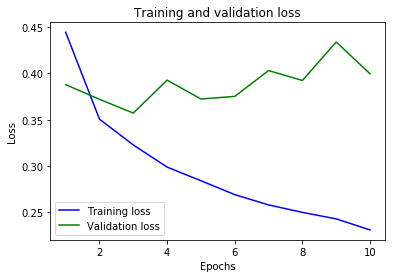

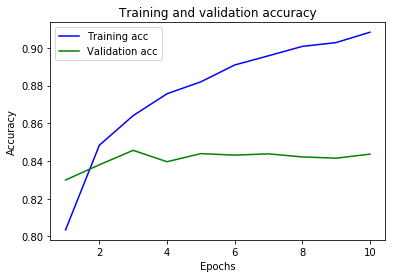

In [25]:
    from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation


    batch_size=64
    epochs = 10
 
    model = models.Sequential()
    model.add(Embedding(top_x_words, 32, input_length=max_length))
    model.add(Dropout(.50))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.50))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(np.array(x_train),np.array(y_train), epochs=epochs,validation_data=(np.array(x_test),np.array(y_test)), batch_size=batch_size)


    history_dict = history.history
    
    loss_values = history_dict['loss']
    loss_values = np.array(loss_values)
    epochs = range(1, len(loss_values) + 1)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)

    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, 'b-',label='Training loss')
    plt.plot(epochs, val_loss_values,'g-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b-', label='Training acc')
    plt.plot(epochs, val_acc_values, 'g-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    


In [26]:
epochs = 2
batch_size= 64

model = models.Sequential()
model.add(Embedding(top_x_words, 32, input_length=max_length))
model.add(Dropout(.50))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(.50))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(np.array(x_train),np.array(y_train), epochs=epochs, batch_size=batch_size)

loss,accuracy = model.evaluate(np.array(x_test),np.array(y_test))
print("loss: "+ str(loss))
print("accuracy: "+ str(accuracy))
results.append(accuracy)
results_names.append("Embed_NN")

Epoch 1/2
29700/29700 [==============================] - 6s 207us/step - loss: 0.4423 - acc: 0.8044
Epoch 2/2
7426/7426 [==============================] - 1s 99us/step
loss: 0.35964076438105524
accuracy: 0.8419068138971182


Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 30s 1ms/step - loss: 0.5076 - acc: 0.7917 - val_loss: 0.5084 - val_acc: 0.7902
Epoch 2/10
29700/29700 [==============================] - 28s 940us/step - loss: 0.4936 - acc: 0.7909 - val_loss: 0.4554 - val_acc: 0.8042
Epoch 3/10
29700/29700 [==============================] - 29s 960us/step - loss: 0.4585 - acc: 0.7998 - val_loss: 0.4538 - val_acc: 0.7322
Epoch 4/10
29700/29700 [==============================] - 28s 940us/step - loss: 0.4554 - acc: 0.8091 - val_loss: 0.5338 - val_acc: 0.7901
Epoch 5/10
29700/29700 [==============================] - 29s 985us/step - loss: 0.4751 - acc: 0.8096 - val_loss: 0.5229 - val_acc: 0.7887
Epoch 6/10
29700/29700 [==============================] - 29s 982us/step - loss: 0.4600 - acc: 0.8147 - val_loss: 0.5356 - val_acc: 0.7841
Epoch 7/10
29700/29700 [==============================] - 28s 940us/step - loss: 0.4570 - acc: 0.8205 - val_loss: 0.554

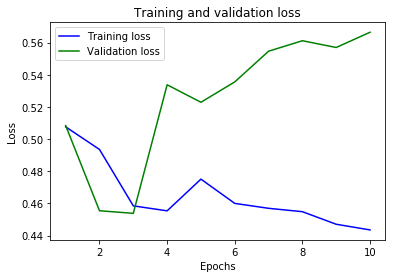

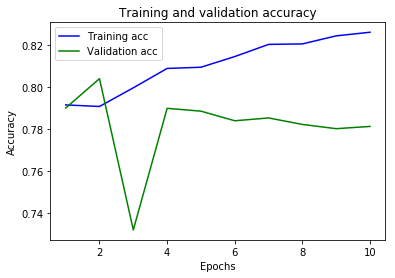

In [27]:
    from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
    from keras.layers import Embedding, SimpleRNN
    batch_size=32
    epochs = 10
 
    model = models.Sequential()
    model.add(Embedding(top_x_words, 32, input_length=max_length))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(np.array(x_train),np.array(y_train), epochs=epochs,validation_data=(np.array(x_test),np.array(y_test)), batch_size=batch_size)


    history_dict = history.history
    
    loss_values = history_dict['loss']
    loss_values = np.array(loss_values)
    epochs = range(1, len(loss_values) + 1)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)

    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, 'b-',label='Training loss')
    plt.plot(epochs, val_loss_values,'g-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b-', label='Training acc')
    plt.plot(epochs, val_acc_values, 'g-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

In [28]:
    batch_size=32
    epochs = 2
 
    model = models.Sequential()
    model.add(Embedding(top_x_words, 32, input_length=max_length))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model.fit(np.array(x_train),np.array(y_train), epochs=epochs, batch_size=batch_size)

    loss,accuracy = model.evaluate(np.array(x_test),np.array(y_test))
    print("loss: "+ str(loss))
    print("accuracy: "+ str(accuracy))
    results.append(accuracy)
    results_names.append("Embed_RNN")

Epoch 1/2
29700/29700 [==============================] - 26s 865us/step - loss: 0.5090 - acc: 0.7898
Epoch 2/2
7426/7426 [==============================] - 2s 303us/step
loss: 0.5145046740184407
accuracy: 0.7897926205224886


Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 120s 4ms/step - loss: 0.5568 - acc: 0.7902 - val_loss: 0.6062 - val_acc: 0.8107
Epoch 2/10
29700/29700 [==============================] - 119s 4ms/step - loss: 1.1956 - acc: 0.7960 - val_loss: 0.4793 - val_acc: 0.7907
Epoch 3/10
29700/29700 [==============================] - 120s 4ms/step - loss: 0.6662 - acc: 0.8146 - val_loss: 0.5010 - val_acc: 0.8187
Epoch 4/10
29700/29700 [==============================] - 119s 4ms/step - loss: 0.6960 - acc: 0.8273 - val_loss: 0.5349 - val_acc: 0.8214
Epoch 5/10
29700/29700 [==============================] - 121s 4ms/step - loss: 0.7183 - acc: 0.8209 - val_loss: 1.2905 - val_acc: 0.7941
Epoch 6/10
29700/29700 [==============================] - 118s 4ms/step - loss: 0.6924 - acc: 0.8069 - val_loss: 1.1002 - val_acc: 0.7184
Epoch 7/10
29700/29700 [==============================] - 119s 4ms/step - loss: 0.9718 - acc: 0.8057 - val_loss: 3.5659 - v

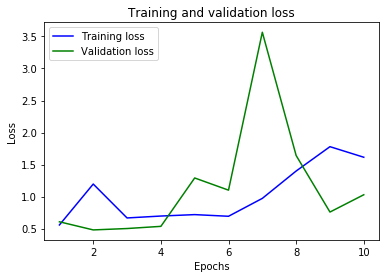

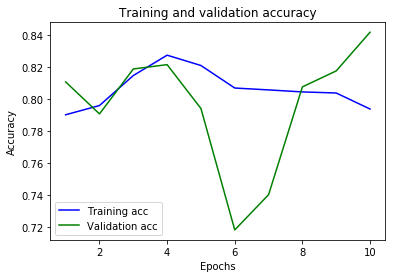

In [29]:
    batch_size=32
    epochs = 10
    from keras.layers import LSTM
    model = models.Sequential()
    model.add(Embedding(top_x_words, 32, input_length=max_length))
    model.add(LSTM(32, dropout=0.20,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(np.array(x_train),np.array(y_train), epochs=epochs,validation_data=(np.array(x_test),np.array(y_test)), batch_size=batch_size)


    history_dict = history.history
    
    loss_values = history_dict['loss']
    loss_values = np.array(loss_values)
    epochs = range(1, len(loss_values) + 1)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)

    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, 'b-',label='Training loss')
    plt.plot(epochs, val_loss_values,'g-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b-', label='Training acc')
    plt.plot(epochs, val_acc_values, 'g-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

In [30]:
    batch_size=32
    epochs = 5
    model = models.Sequential()
    model.add(Embedding(top_x_words, 32, input_length=max_length))
    model.add(LSTM(32,dropout=0.20,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
    model.fit(np.array(x_train),np.array(y_train), epochs=epochs, batch_size=batch_size)

    loss,accuracy = model.evaluate(np.array(x_test),np.array(y_test))
    print("loss: "+ str(loss))
    print("accuracy: "+ str(accuracy))
    results.append(accuracy)
    results_names.append("Embed_LTSM")

Epoch 1/5
29700/29700 [==============================] - 114s 4ms/step - loss: 0.5207 - acc: 0.7911
Epoch 2/5
29700/29700 [==============================] - 114s 4ms/step - loss: 1.0050 - acc: 0.7963
Epoch 3/5
29700/29700 [==============================] - 115s 4ms/step - loss: 0.6159 - acc: 0.8225
Epoch 4/5
29700/29700 [==============================] - 110s 4ms/step - loss: 0.6594 - acc: 0.8372
Epoch 5/5
7426/7426 [==============================] - 5s 701us/step
loss: 0.6726854421878612
accuracy: 0.8304605440344734


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 7, padding="same")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 5, padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`


Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 46s 2ms/step - loss: 0.3864 - acc: 0.8295 - val_loss: 0.3481 - val_acc: 0.8465
Epoch 2/10
29700/29700 [==============================] - 39s 1ms/step - loss: 0.3189 - acc: 0.8634 - val_loss: 0.3562 - val_acc: 0.8477
Epoch 3/10
29700/29700 [==============================] - 36s 1ms/step - loss: 0.3007 - acc: 0.8732 - val_loss: 0.3330 - val_acc: 0.8569
Epoch 4/10
29700/29700 [==============================] - 34s 1ms/step - loss: 0.2858 - acc: 0.8809 - val_loss: 0.4128 - val_acc: 0.8115
Epoch 5/10
29700/29700 [==============================] - 30s 1ms/step - loss: 0.2729 - acc: 0.8878 - val_loss: 0.3481 - val_acc: 0.8567
Epoch 6/10
29700/29700 [==============================] - 32s 1ms/step - loss: 0.2568 - acc: 0.8962 - val_loss: 0.3462 - val_acc: 0.8538
Epoch 7/10
29700/29700 [==============================] - 34s 1ms/step - loss: 0.2393 - acc: 0.9056 - val_loss: 0.3656 - val_acc:

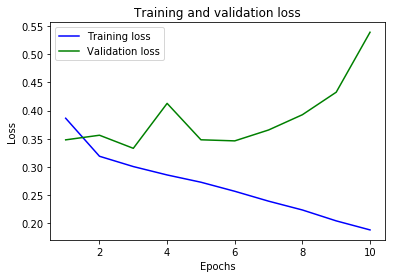

In [31]:

    from keras.layers.convolutional import Conv1D
    from keras.layers import Dense, LSTM, GlobalMaxPool1D,MaxPool1D
    batch_size=64
    epochs = 10
    from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation


    model = models.Sequential()
    model.add(Embedding(top_x_words,128, input_shape= (max_length,)))
    model.add(Conv1D(32, 7, border_mode='same'))
    model.add(Dropout(0.5))
    model.add(Conv1D(32, 5, border_mode='same'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(32, 3, border_mode='same'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1,activation='sigmoid'))

    model.compile( optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.array(x_train),np.array(y_train), epochs=epochs,validation_data=(np.array(x_test),np.array(y_test)), batch_size=batch_size)
    
    
    history_dict = history.history
    loss_values = history_dict['loss']
    loss_values = np.array(loss_values)
    val_loss_values = history_dict['val_loss']
    val_loss_values = np.array(val_loss_values)

    epochs = range(1, len(loss_values) + 1)

    #This will show the training and validation loss per epoch
    plt.plot(epochs, loss_values, 'b-',label='Training loss')
    plt.plot(epochs, val_loss_values,'g-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    #This will show the training and validation accuracy per epoch
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b-', label='Training acc')
    plt.plot(epochs, val_acc_values, 'g-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 7, padding="same")`
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 5, padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/3
29700/29700 [==============================] - 35s 1ms/step - loss: 0.3948 - acc: 0.8276
Epoch 2/3
29700/29700 [==============================] - 33s 1ms/step - loss: 0.3217 - acc: 0.8625
Epoch 3/3
7426/7426 [==============================] - 3s 399us/step
loss: 0.41880765174426
accuracy: 0.807837328305952


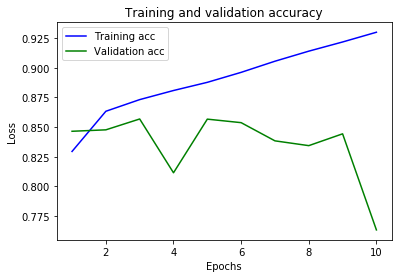

In [32]:
epochs = 3
batch_size= 64
    

model = models.Sequential()
model.add(Embedding(top_x_words,128, input_shape= (max_length,)))
model.add(Conv1D(32, 7, border_mode='same'))
model.add(Dropout(0.5))
model.add(Conv1D(32, 5, border_mode='same'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 3, border_mode='same'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation='sigmoid'))




model.compile( optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(np.array(x_train),np.array(y_train), epochs=epochs, batch_size=batch_size)
    
loss,accuracy = model.evaluate(np.array(x_test),np.array(y_test))
print("loss: "+ str(loss))
print("accuracy: "+ str(accuracy))
results.append(accuracy)
results_names.append("Embed_CNN")


In [33]:
    value = sum(y_test)
    positive = value/len(y_test)
    negative = 1 - positive
    print("Percent positive reviews: " + str(positive))
    print("Percent Negative reviews: " + str(negative))
    print("Finished with data")


Percent positive reviews: 0.7876380285483436
Percent Negative reviews: 0.21236197145165636
Finished with data


<Figure size 432x288 with 0 Axes>

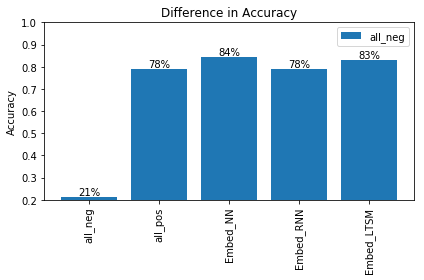

In [36]:
    plt.clf()
    y_len = np.arange(len(results))
    fig, ax = plt.subplots()
    chart= plt.bar(y_len, results, align='center')#, alpha=0.5)
    plt.xticks(rotation=90)
    plt.xticks(y_len, results_names)
    plt.ylim(0.2, 1.0)
    plt.ylabel('Accuracy')
    plt.title('Difference in Accuracy')
    plt.legend(results_names)

    i=0
    for bar in chart:
        height = bar.get_height()
        #print(height)
        ax.text(bar.get_x() + bar.get_width()/2., height,'%d' % int(height*100) + "%", ha='center', va='bottom')

        i+=1
    plt.tight_layout()
    plt.show()

In [ ]:
'''
Embedding Conlusion: 
From the results I get, the embeded NN does best. All the results were still between 
are between 78-84%, which is worse than the Unigram or Bigram models. The VectorCount for
Unigram does around 85-86% accuracy, with the Keras and LR model doing the best. 
The Bigram model does around 86-88%accuracy.

>Why these results ?
The LSTM model did not have much tuning of hyperparameters, such as tuning the embedding dimensionality
or tuning the output dimensionality. Also a  lack of regularization likely hurt it. But the big thing is
LTSM isn't best for sentiment analysis, but better for Question - answer type of problems.
            
The RNN also did not do that well. This is likely because it is a small network, and we only consider
the first 100 words in a review. Thus the RNN has less information to train on than vs the
bag of words model, and RNNs are not the best for very long sequences.

And lastly our convolutional network. This model didn't do the worst, but also not the best. Likely with some
tuning it would do better, but again runs into the issue of not enough data. The CNN should perform as well, if not better
than the LSTM, and has the benefit of being faster. Which in our case it did.

Future Ideas:
    Explore Bigram models more. 
    Explore trigram models.
'''